In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
spectrum_data_file = 'https://raw.githubusercontent.com/mcgeese1/E11ErinJulianKyo/refs/heads/main/Week_13_Spectrum.csv'
location_data_file = 'https://raw.githubusercontent.com/mcgeese1/E11ErinJulianKyo/refs/heads/main/Week_13_Location.csv'
spectrum_df = pd.read_csv(spectrum_data_file)
location_df = pd.read_csv(location_data_file)
location_df

,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,1.743815e+09,0,0,37.0,1.0,1.0,1.0,24.185469,43.760715,1005.671178,63.290818,22586.5
1,1.743815e+09,0,0,43.0,1.0,1.0,1.0,24.270039,43.548563,1005.666276,63.331876,30505.5
2,1.743815e+09,0,0,51.5,0.5,1.0,1.0,24.331660,43.358618,1005.666336,63.331371,37974.0
3,1.743815e+09,0,0,51.5,0.5,1.0,1.0,24.381172,43.185924,1005.660172,63.383008,44849.0
4,1.743815e+09,0,0,42.5,0.0,1.0,1.0,24.420137,43.027537,1005.648415,63.481493,50729.0
...,...,...,...,...,...,...,...,...,...,...,...,...
322,1.743815e+09,0,0,32.0,1.0,2.0,2.0,23.359883,39.776192,1004.569766,72.520832,185084.0
323,1.743815e+09,0,0,25.0,1.0,2.0,2.0,23.359883,39.776192,1004.569766,72.520832,185084.0
324,1.743815e+09,0,0,27.0,1.0,2.0,2.0,23.352949,39.901739,1004.564370,72.566073,184477.0
325,1.743815e+09,0,0,27.0,1.0,2.0,2.0,23.348848,40.027682,1004.558867,72.612208,183160.0


a)

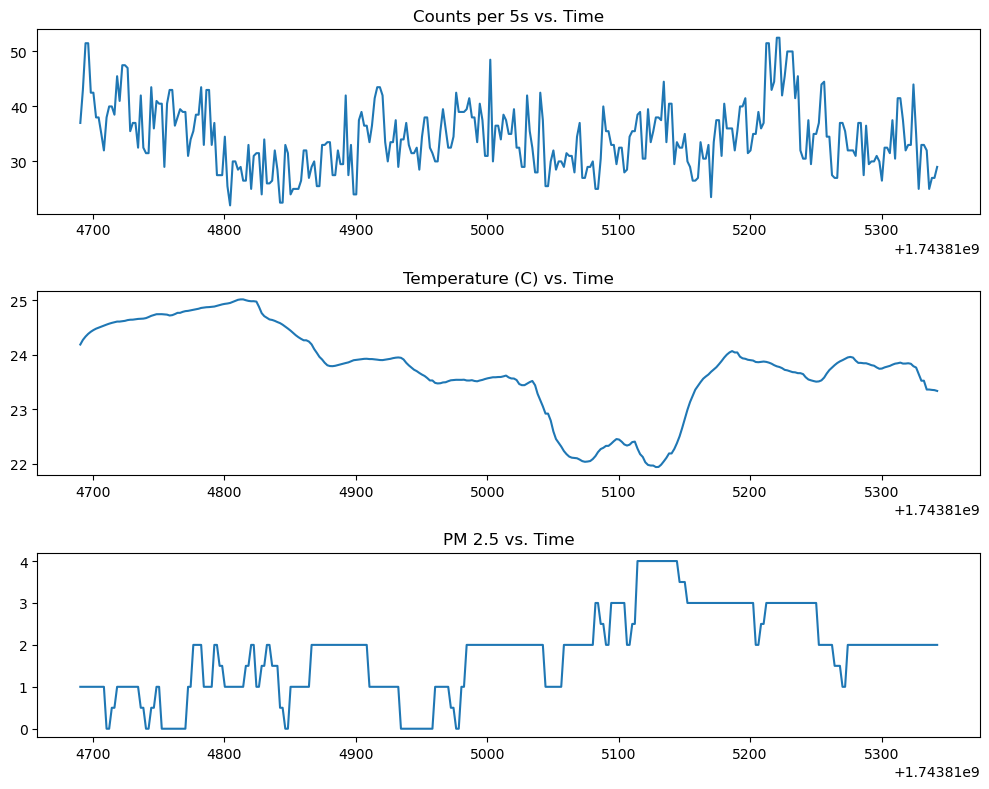

In [150]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(location_df['Time'],location_df['counts'],label = 'Counts per 5s vs. Time')
plt.title('Counts per 5s vs. Time')
plt.subplot(3,1,2)
plt.plot(location_df['Time'],location_df['Temperature'],label = 'Temperature (C) vs. Time')
plt.title('Temperature (C) vs. Time')
plt.subplot(3,1,3)
plt.plot(location_df['Time'],location_df['PM25'],label = 'PM 2.5 vs. Time')
plt.title('PM 2.5 vs. Time')
plt.tight_layout()
plt.show()

Our GPS did not work, we could not collect position data.

b)

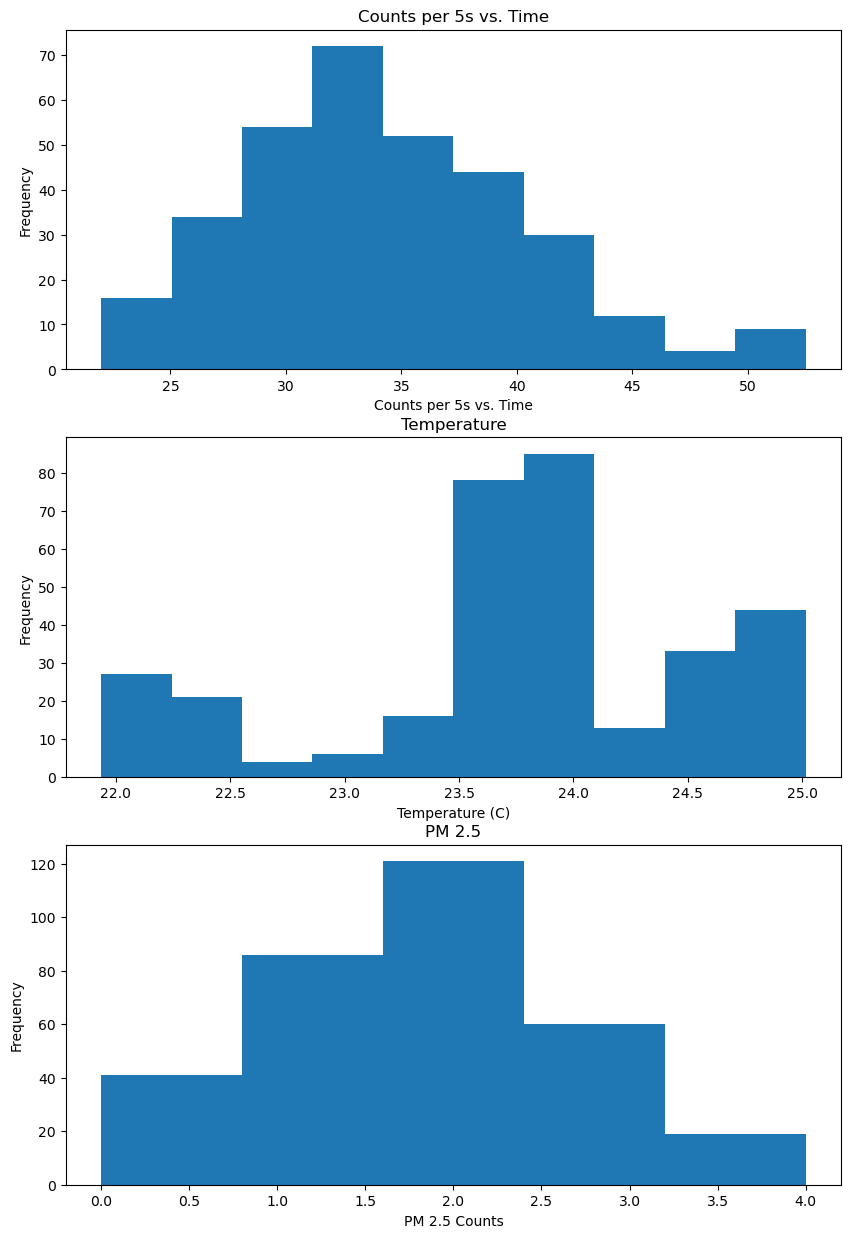

In [152]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.hist(location_df['counts'])
plt.title('Counts per 5s vs. Time')
plt.xlabel('Counts per 5s vs. Time')
plt.ylabel('Frequency')

plt.subplot(3,1,2)
plt.hist(location_df['Temperature'])
plt.title('Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
plt.hist(location_df['PM25'], bins = 5)
plt.title('PM 2.5')
plt.xlabel('PM 2.5 Counts')
plt.ylabel('Frequency')

plt.show()

#### CPM Shows a normal distribution because it relies on a stochastic process. However, Temperature and PM 2.5 are not random, and varied especially with WHERE data was collected as we moved and walked.

c)

In [157]:
counts = location_df["counts"]
meancounts = np.mean(counts)
uncertainty_theoretical = np.sqrt(meancounts)
uncertainty_measured = np.std(counts)
print(f"Theoretical uncertainty: {np.sqrt(meancounts):.2f}")
print(f"Measured standard deviation: {np.std(counts):.2f}")

Theoretical uncertainty: 5.87
Measured standard deviation: 6.08


We expected it to follow sqrt(N), and this is pretty close to the actual uncertainty

d)

In [161]:
uncertainty_standard_deviation = np.sqrt(meancounts)/np.sqrt(2*np.sqrt(len(counts)))
print('Uncertainty of the Standard Deviation is {:.2f}'.format(uncertainty_standard_deviation))

Uncertainty of the Standard Deviation is 0.98


e)

Yes, we did see more uncertainty than we would expect from simple counting statistics. An ideal normal distribution would be seen when samples are independent and identcally distributed. The deviation from agreement could be due to the radiation not being independent, with having different decays that are related, for example if there is correlated decays between a certain isotope (from one decay into another which then quickly decays and creates new radiation). Also since we were walking around, it is likely that the radiation was not identical, due to there being different radiation levels in different locations.

f)